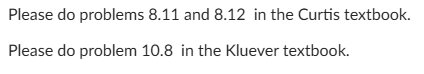

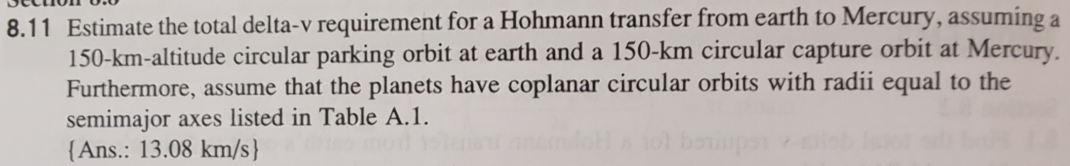

In [1]:
import sympy
from sympy import *
import sys

# symbols

μ_Sun        = Symbol( 'μ_Sun' )   # Sun geocentric graviational constant, km^3/s^2
μ_1          = Symbol( 'μ_1' )     # planet #1 geocentric graviational constant, km^3/s^2
μ_2          = Symbol( 'μ_2' )     # planet #2 geocentric graviational constant, km^3/s^2
R_1          = Symbol( 'R_1' )     # heliocentric radius of planet #1, km        
R_2          = Symbol( 'R_2' )     # heliocentric radius of planet #2, km
r_1          = Symbol( 'r_1' )     # planet #1 radius, km
r_2          = Symbol( 'r_2' )     # planet #2 radius, km
h_1e         = Symbol( 'h_1e' )    # planet #1 circular parking orbit altitude, km
h_2e         = Symbol( 'h_2e' )    # planet #2 circular parking orbit altitude, km
r_1e         = Symbol( 'r_1e' )    # planet #1 circular parking orbit radius, km
r_2e         = Symbol( 'r_2e' )    # planet #2 circular parking orbit radius, km

# values for a Earth ( planet #1 ) to Mercury ( planet #2 ) mission

values = [
            ( r_1e  , h_1e + r_1 ) ,
            ( r_2e  , h_2e + r_2 ) ,
            ( μ_Sun , 1.327 * 10**11 ) ,
            ( μ_1   , 3.986 * 10**5 ) , # Earth
            ( μ_2   , 2.2032 * 10**4 ) , # Mercury
            ( R_1   , 149.6 * 10**6 ) ,
            ( R_2   , 57.91 * 10**6 ) ,    
            ( r_1   , 6378 ) ,
            ( r_2   , 2440 ) ,
            ( h_1e  , 150 ) ,
            ( h_2e  , 150 ) ,
]

# heliocentric velocities of planets around the sun

V_1 = sqrt( μ_Sun / R_1 )
V_2 = sqrt( μ_Sun / R_2 )

# transfer orbit characteristics
a_H = ( R_1 + R_2 ) / 2
ϵ_H = - μ_Sun / ( 2 * a_H )

# arrival and departure velocities
V_H_1 = sqrt( 2 * μ_Sun / R_1 + 2 * ϵ_H )
V_H_2 = sqrt( 2 * μ_Sun / R_2 + 2 * ϵ_H )

# transfer angular momentum & eccentricity
h_H = V_H_1 * R_1

e_H = sqrt( 1 - h_H**2 / ( μ_Sun * a_H ) )

# planet 1 required escape velocity
v_inf_plus_1 = V_H_1 - V_1

ϵ_1h = v_inf_plus_1**2 / 2

# escape trajectory velocity at parking orbit altitude
v_p_1h = sqrt( 2 * μ_1 / r_1e + 2 * ϵ_1h )

v_1e = sqrt( μ_1 / r_1e )

Δv_1 = v_p_1h - v_1e



# Planet 2 Arrival parameters 
v_inf_minus_2 = V_H_2 - V_2

ϵ_2h = v_inf_minus_2**2 / 2

# hyperbolic arrival velocity at target parking orbit altitude
v_p_2h = sqrt( 2 * μ_2 / r_2e + 2 * ϵ_2h )

v_2e = sqrt( μ_2 / r_2e )

Δv_2 = v_p_2h - v_2e


# total delta V required:
Δv_total = Δv_1 + Δv_2

print( 'Total Δv required ' , Δv_total.subs( values ).evalf() , 'km/s' )


Total Δv required  13.1017486054119 km/s


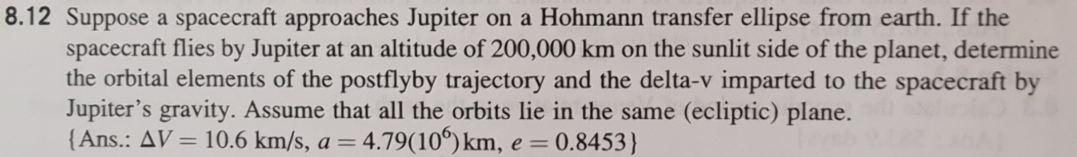

In [2]:
%reset -f
import sympy
from sympy import *
import sys
from sympy.vector import CoordSys3D

# symbols

μ_Sun        = Symbol( 'μ_Sun' )   # Sun geocentric graviational constant, km^3/s^2
μ_1          = Symbol( 'μ_1' )     # planet #1 geocentric graviational constant, km^3/s^2
μ_2          = Symbol( 'μ_2' )     # planet #2 geocentric graviational constant, km^3/s^2
R_1          = Symbol( 'R_1' )     # heliocentric radius of planet #1, km        
R_2          = Symbol( 'R_2' )     # heliocentric radius of planet #2, km
r_2          = Symbol( 'r_2' )     # planet #2 radius, km
h_2e         = Symbol( 'h_2e' )    # planet #2 circular parking orbit altitude, km
r_2e         = Symbol( 'r_2e' )    # planet #2 circular parking orbit radius, km

# values for a Earth ( planet #1 ) to Mercury ( planet #2 ) mission

values = [
            ( r_2e  , h_2e + r_2 ) ,
            ( μ_Sun , 1.327 * 10**11 ) ,
            ( μ_2   , 1.267 * 10**8 ) , # Jupiter
            ( R_1   , 149.6 * 10**6 ) ,
            ( R_2   , 778.6 * 10**6 ) , # Jupiter solar semimajor axis
            ( r_2   , 71490 ) ,
            ( h_2e  , 200000 ) ,
]

# transfer orbit semi-major axis
a_t = (R_1 + R_2)/2

# transfer orbit apoapsis velocity V_H_2 is v_ap_1
v_ap_1 = sqrt(μ_Sun*(2/R_2 - 1/a_t))

V_H_1 = sqrt( 2 * μ_Sun / R_1 - (2 * μ_Sun / ( 2 * a_t )) )

h_t = V_H_1 * R_1
e_t = sqrt( 1 - h_t**2 / ( μ_Sun * a_t ) )


# Jupiter (target) circular velocities V_2 is v_target
v_target = sqrt( μ_Sun / R_2)


# Planet 2 Arrival parameters 
v_inf = v_target - v_ap_1

ϵ_2h = v_inf**2 / 2
a_2h = - μ_2 / ( 2 * ϵ_2h )

# hyperbolic arrival velocity at target parking orbit altitude
v_p_2h = sqrt( 2 * μ_2 / r_2e + 2 * ϵ_2h )
h_2h = v_p_2h * r_2e
e_2h = sqrt( 1 - h_2h**2 / ( μ_2 * a_2h ) )

δ_2h = 2 * asin( 1 / e_2h)
print( 'turning angle ' , (δ_2h * 180/pi).subs( values ).evalf() , 'degrees' )


# Turning Radius velocities

V_2_x = abs(v_target) * cos(-pi/2)
V_2_y = abs(v_target) * sin(-pi/2)
V_2_z = abs(v_target) * 0

V_H_2_x = abs(v_ap_1) * cos(-pi/2)
V_H_2_y = abs(v_ap_1) * sin(-pi/2)
V_H_2_z = abs(v_ap_1) * 0

v_inf_plus_2_x_sunlit_side = abs(v_inf) * cos( pi/2 + δ_2h)
v_inf_plus_2_y_sunlit_side = abs(v_inf) * sin( pi/2 + δ_2h)
v_inf_plus_2_z_sunlit_side = abs(v_inf) * 0

V_H_2_x_plus_light_side = V_2_x + v_inf_plus_2_x_sunlit_side
V_H_2_y_plus_light_side = V_2_y + v_inf_plus_2_y_sunlit_side
V_H_2_z_plus_light_side = V_2_z + v_inf_plus_2_z_sunlit_side

V_H_2_plus_sunlit_side = sqrt(V_H_2_x_plus_light_side**2 + V_H_2_y_plus_light_side**2 + V_H_2_z_plus_light_side**2)

# lets compare it with Jupiter not being there

# delta V imparted:
ΔV_H_2_sunlit_side = sqrt( ( V_H_2_x - V_H_2_x_plus_light_side )**2 
                          + ( V_H_2_y - V_H_2_y_plus_light_side )**2 
                          + ( V_H_2_z - V_H_2_z_plus_light_side )**2)

print( 'V_H_2_plus_sunlit_side = ' , V_H_2_plus_sunlit_side.subs( values ).evalf() , 'km/s' )
print( 'v_ap_1 = ' , v_ap_1.subs( values ).evalf() , 'km/s' )
print( 'old heliocentric semimajoraxis; a = ' , a_t.subs( values ).evalf() )
print( 'old heliocentric eccentricity; e = ' , e_t.subs( values ).evalf() )
print()

ε_new = V_H_2_plus_sunlit_side**2 / 2 - μ_Sun / R_2

# new heliocentric orbital elements
a_new = -μ_Sun / (2*ε_new)

# new angular momentum
N = CoordSys3D('N')


v_new = V_H_2_x_plus_light_side * N.i + V_H_2_y_plus_light_side * N.j + V_H_2_z_plus_light_side * N.k

r_Jup = R_2 * N.i

h_new= r_Jup.cross(v_new)


# Equation 2.40, rearranged
e_new = v_new.cross(h_new)/μ_Sun - r_Jup/r_Jup.magnitude()

r_ap_after = (h_new**2)/(μ_Sun*(1 + e_new.magnitude()*cos(180*pi/180)))
r_pe_after = (h_new**2)/(μ_Sun*(1 + e_new.magnitude()*cos(0)))

# lets compare with previous values
print( 'r_pe_after = ' , (r_pe_after/10**9).subs( values ).evalf(), '10^9 km' )
print( 'r_ap_after = ' , (r_ap_after/10**9).subs( values ).evalf(), '10^9 km' )
print()

print( 'ΔV imparted from flyby = ' , ΔV_H_2_sunlit_side.subs( values ).evalf() , 'km/s' )
print( 'new heliocentric semimajoraxis; a = ' , (a_new/10**9).subs( values ).evalf(), '10^9 km' )
print( 'new heliocentric eccentricity; e = ' , (e_new.magnitude()).subs( values ).evalf() )

turning angle  138.821364878448 degrees
V_H_2_plus_sunlit_side =  17.6967152368819 km/s
v_ap_1 =  7.41204887337324 km/s
old heliocentric semimajoraxis; a =  464100000.000000
old heliocentric eccentricity; e =  0.677655677655678

r_pe_after =  0.741126251081853*N.k**2 10^9 km
r_ap_after =  8.84200575746984*N.k**2 10^9 km

ΔV imparted from flyby =  10.5650945612689 km/s
new heliocentric semimajoraxis; a =  4.79156600427585 10^9 km
new heliocentric eccentricity; e =  0.845326924345716


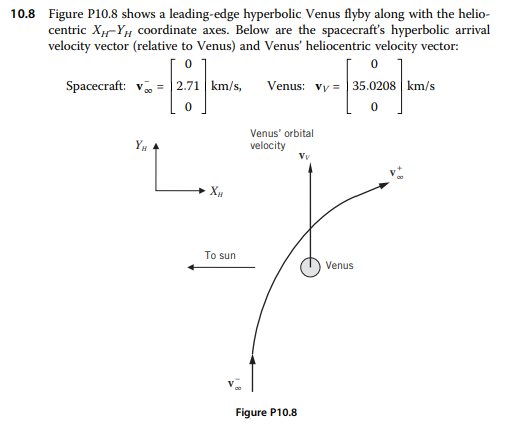

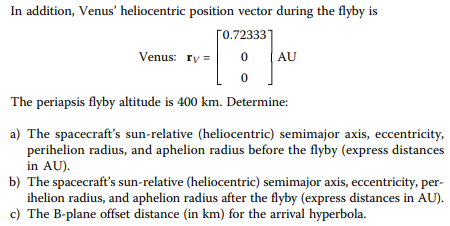

In [4]:
%reset -f
import sympy
from sympy import *
import sys
from sympy.vector import CoordSys3D
# symbols

μ_Sun        = Symbol( 'μ_Sun' )   # Sun geocentric graviational constant, km^3/s^2
μ_2          = Symbol( 'μ_2' )     # planet #2 geocentric graviational constant, km^3/s^2
v_inf          = Symbol( 'v_inf' )          
R_2          = Symbol( 'R_2' )     # heliocentric radius of planet #2, km
r_2          = Symbol( 'r_2' )     # planet #2 radius, km
h_2e         = Symbol( 'h_2e' )    # planet #2 circular parking orbit altitude, km
r_2e         = Symbol( 'r_2e' )    # planet #2 circular parking orbit radius, km

# values for a Earth ( planet #1 ) to Mercury ( planet #2 ) mission

values = [
            ( r_2e  , h_2e + r_2 ) ,
            ( μ_Sun , 1.327 * 10**11 ) ,
            ( μ_2   , 3.2486 * 10**5 ) , # Venus
            ( R_2   , 108.2 * 10**6 ) , # Venus solar semimajor axis
            ( r_2   , 6052 ) ,         # Venus radius
            ( h_2e  , 400 ) ,        # flyby altitude
            ( v_inf  , 2.71 ) ,        # hyperbolic excess velocity, km/s
]

km_in_AU = 149.6*10**6

# calculate Venus velocity:
V_2 = sqrt( μ_Sun / R_2 )

# need before and after:
#  semimajor axis, a
#  eccentricity, e
# perihelion radius
# aphelion radius

# also the offset distance

# the excess velocity if venus weren't there:
v_pe_before = V_2 + v_inf

h_before = R_2 * v_pe_before

ϵ_before = (v_pe_before**2)/2 - μ_Sun/R_2

a_before = - μ_Sun / ( 2 * ϵ_before )

r_apoapsis_before = 2*a_before - R_2
e_before = (r_apoapsis_before - R_2)/(r_apoapsis_before + R_2)

print("(A) Heliocentric orbit parameters before flyby")
print("semimajor axis,  a:",(a_before/km_in_AU).subs(values).evalf(),"AU")
print("eccentricity,    e:",e_before.subs(values).evalf())
print("Perihelion,     Pe:",(R_2/km_in_AU).subs(values).evalf(),"AU")
print("Aphelion,       Ap:",(r_apoapsis_before/km_in_AU).subs(values).evalf(),"AU")

# Now lets calculate the after-flyby orbital parameters

# periapse velocity of venus flyby orbit & angular momentum
ϵ_2h = v_inf**2 / 2

v_p_2h = sqrt( 2 * μ_2 / r_2e + 2 * ϵ_2h )

a_2h = - μ_2 / ( 2 * ϵ_2h )

h_2h = v_p_2h * r_2e

e_2h = sqrt( 1 - h_2h**2 / ( μ_2 * a_2h ) )

δ_2h = 2 * asin( 1 / e_2h)
print()
print( 'Turn angle, δ_2h = ' , (δ_2h*180/pi).subs( values ).evalf() )
print()

# leading sunlit-side flyby
# Turning Radius velocities

venus_current_angle = pi/2

V_2_x = abs(V_2) * cos(venus_current_angle)
V_2_y = abs(V_2) * sin(venus_current_angle)
V_2_z = abs(V_2) * 0

V_H_2_x = abs(v_pe_before) * cos(venus_current_angle)
V_H_2_y = abs(v_pe_before) * sin(venus_current_angle)
V_H_2_z = abs(v_pe_before) * 0

v_inf_plus_2_x_sunlit_side = abs(v_inf) * cos(pi/2 - δ_2h)
v_inf_plus_2_y_sunlit_side = abs(v_inf) * sin(pi/2 - δ_2h)
v_inf_plus_2_z_sunlit_side = abs(v_inf) * 0
print()
print( 'x_venus_helio_velocity = ' , V_2_x.subs( values ).evalf() , 'km/s' )
print( 'y_venus_helio_velocity = ' , V_2_y.subs( values ).evalf() , 'km/s' )
print( 'z_venus_helio_velocity = ' , V_2_z.subs( values ).evalf() , 'km/s' )

print()

print( 'x_exit_velocity = ' , v_inf_plus_2_x_sunlit_side.subs( values ).evalf() , 'km/s' )
print( 'y_exit_velocity = ' , v_inf_plus_2_y_sunlit_side.subs( values ).evalf() , 'km/s' )
print( 'z_exit_velocity = ' , v_inf_plus_2_z_sunlit_side.subs( values ).evalf() , 'km/s' )

print()

V_H_2_x_plus_light_side = V_2_x + v_inf_plus_2_x_sunlit_side
V_H_2_y_plus_light_side = V_2_y + v_inf_plus_2_y_sunlit_side
V_H_2_z_plus_light_side = V_2_z + v_inf_plus_2_z_sunlit_side

V_H_2_plus_sunlit_side = sqrt(V_H_2_x_plus_light_side**2 + V_H_2_y_plus_light_side**2 + V_H_2_z_plus_light_side**2)

# lets compare it with Jupiter not being there

# delta V imparted:
ΔV_H_2_sunlit_side = sqrt( ( V_H_2_x - V_H_2_x_plus_light_side )**2 
                          + ( V_H_2_y - V_H_2_y_plus_light_side )**2 
                          + ( V_H_2_z - V_H_2_z_plus_light_side )**2)

print( 'V_H_2_plus_sunlit_side = ' , V_H_2_plus_sunlit_side.subs( values ).evalf() , 'km/s' )
print( 'v_pe_before = ' , v_pe_before.subs( values ).evalf() , 'km/s' )
print()

ε_new = V_H_2_plus_sunlit_side**2 / 2 - μ_Sun / R_2

# new heliocentric orbital elements

a_new = -μ_Sun / (2*ε_new)

# new angular momentum
N = CoordSys3D('N')


v_new = V_H_2_x_plus_light_side * N.i + V_H_2_y_plus_light_side * N.j + V_H_2_z_plus_light_side * N.k

r_venus = R_2 * N.i

h_new= r_venus.cross(v_new)


# Equation 2.40, rearranged
e_new = v_new.cross(h_new)/μ_Sun - r_venus/r_venus.magnitude()

# to get true enomoly we rearrange the definition of the dot product
true_anomaly = acos(r_venus.dot(e_new)/(r_venus.magnitude()*e_new.magnitude()))*180/pi
print("h_new:", h_new.subs(values).evalf()," momentum")

print("After fly-by True Anomoly:", true_anomaly.subs(values).evalf(),"degrees")

# lets compare with previous values

print( 'ΔV imparted from flyby = ' , ΔV_H_2_sunlit_side.subs( values ).evalf() , 'km/s' )

r_ap_after = (h_new**2)/(μ_Sun*(1 + e_new.magnitude()*cos(180*pi/180)))
r_pe_after = (h_new**2)/(μ_Sun*(1 + e_new.magnitude()*cos(0)))
print()
print("(B) Heliocentric orbit parameters after flyby")
print("semimajor axis,  a:",(a_new/km_in_AU).subs(values).evalf(),"AU")
print("eccentricity,    e:",(e_new.magnitude()).subs(values).evalf())
print("Perihelion,     Pe:",(r_pe_after/km_in_AU).subs(values).evalf(),"AU")
print("Aphelion,       Ap:",(r_ap_after/km_in_AU).subs(values).evalf(),"AU")

d = h_2h/v_inf

print()
print("(C) Offset distance:",(d).subs(values).evalf(),"km")


(A) Heliocentric orbit parameters before flyby
semimajor axis,  a: 0.861800676757516 AU
eccentricity,    e: 0.160754857136107
Perihelion,     Pe: 0.723262032085562 AU
Aphelion,       Ap: 1.00033932142947 AU

Turn angle, δ_2h =  121.549462895159


x_venus_helio_velocity =  0 km/s
y_venus_helio_velocity =  35.0204587683757 km/s
z_venus_helio_velocity =  0 km/s

x_exit_velocity =  2.30943159028503 km/s
y_exit_velocity =  -1.41796534858703 km/s
z_exit_velocity =  0 km/s

V_H_2_plus_sunlit_side =  33.6817612113314 km/s
v_pe_before =  37.7304587683757 km/s

h_new: 3635789788.02114*N.k  momentum
After fly-by True Anomoly: 141.426938488017 degrees
ΔV imparted from flyby =  4.73007105542208 km/s

(B) Heliocentric orbit parameters after flyby
semimajor axis,  a: 0.672807476161192 AU
eccentricity,    e: 0.101481778568186
Perihelion,     Pe: 0.604529776846382*N.k**2 AU
Aphelion,       Ap: 0.741085175476002*N.k**2 AU

(C) Offset distance: 24747.2369907320 km
